## SHIVAM GUPTA


GRIPJAN21

## DATA SCIENCE AND BUSINESS ANALYST INTERN,THE SPARKS FOUNDATION

## TASK 1:Prediction using supervised ML

## PREDICT THE PERCENTAGE OF AN STUDENT BASED ON NO. OF STUDY HOURS. 

Simple linear regression task as it involves just 2 variables.

DATA SOURCE:http://bit.ly/w-data

Problem: What will be predicted score if a student studies for 9.25 hrs/ day?

In [15]:
#Importing all the libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
#Reading the data. 
data=pd.read_csv("http://bit.ly/w-data")
print(type(data))
data.head(10)

<class 'pandas.core.frame.DataFrame'>


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [10]:
#print shape of table and data types of columns
print(data.shape)
print(data.dtypes)

(25, 2)
Hours     float64
Scores      int64
dtype: object


In [11]:
#Describing important factors of the table
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [62]:
#Find null values in table
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [63]:
#Another way to check null values in table
data.isnull == True

False

There is no null value in the dataset

# Now Visualization of dataset 

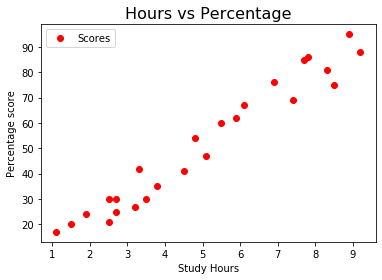

In [22]:
#ploting the distribution of scores
data.plot(x='Hours',y='Scores',style='ro')
plt.title("Hours vs Percentage",fontsize=16)
plt.xlabel('Study Hours')
plt.ylabel('Percentage score')
plt.show()

From the above Scattered Graph,we can conclude that there is positive linear relation between the no. of Hours studies and Percentage score. 

In [17]:
#Dividing the data into attributes and lebels
X=data.Hours      
print(X)

0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64


In [27]:
X=data.iloc[:, :-1].values #convert in 2D array
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [18]:
Y=data.Scores 
print(Y)

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64


In [28]:
Y=data.iloc[:, 1].values 
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

## Spliting the Data into two parts one for Training and one for Testing

In [67]:
from sklearn import model_selection
X_train,X_test,Y_train,Y_test=model_selection.train_test_split(X,Y,test_size=0.2)

Here,80% dataset is going for train and 20% dataset is for test.

In [68]:
print(X_train.shape)
print(X_test.shape)

(20, 1)
(5, 1)


In [69]:
print(Y_train.shape)
print(Y_test.shape)

(20,)
(5,)


# Import linear Regression to get Algorithm.

In [70]:
from sklearn.linear_model import LinearRegression
regg=LinearRegression()

# Training the Model

In [71]:
regg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
#Regression line
y_line=regg.coef_*X+regg.intercept_

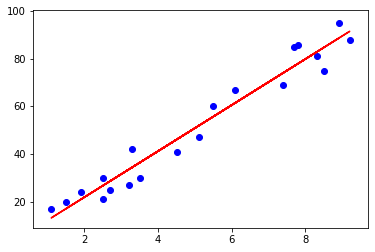

In [73]:
#Ploting 
plt.plot(X,y_line,color='red')
plt.scatter(X_train,Y_train,color='blue')
plt.show()

# Testing the model 

In [74]:
#Predict the scores
y_pred=regg.predict(X_test)
print(X_test)

[[3.8]
 [4.8]
 [6.9]
 [5.9]
 [2.7]]


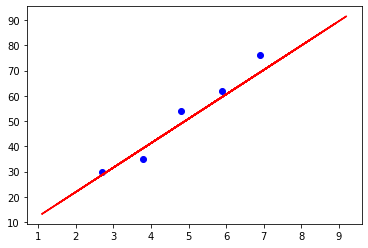

In [75]:
#ploting
plt.plot(X,y_line,color='red')
plt.scatter(X_test,Y_test,color='blue')
plt.show()

In [76]:
#Comparing Actual Hours and predicted marks
compare=pd.DataFrame({'Actual Hours':[i[0] for i in X_test],'predicted Marks':[j for j in y_pred]})
compare

,Actual Hours,predicted Marks
0,3.8,39.313103
1,4.8,48.985243
2,6.9,69.296738
3,5.9,59.624598
4,2.7,28.673749


In [77]:
#Comparing Actual marks and Predicted marks
predict=pd.DataFrame({'Actual marks': Y_test,'Predicted Marks':y_pred})
predict

,Actual marks,Predicted Marks
0,35,39.313103
1,54,48.985243
2,76,69.296738
3,62,59.624598
4,30,28.673749


# Comparison between Actual vs Predicted

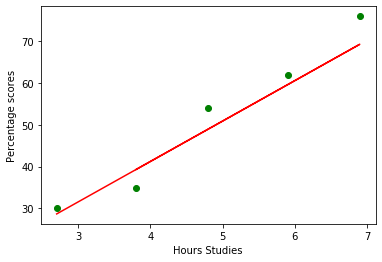

In [78]:
plt.scatter(X_test,Y_test,color='green')
plt.plot(X_test,y_pred,color='red')
plt.xlabel('Hours Studies')
plt.ylabel('Percentage scores')
plt.show()

## Predicted score if a student student studies for 9.25 hours per day?

In [81]:
hours=[9.25]
score_pred=regg.predict([hours])
print("No. of Hours = {}".format([hours]))
print("Predicted Score = {}".format(score_pred[0]))

No. of Hours = [[9.25]]
Predicted Score = 92.02626826928501


According to this model if student studies 9.25 hrs/day then its predicted score is approximately 92.02 %.

## Evaluating the Model

This is very Important step to final evaluation of the performance of algorithm.

In [83]:
from sklearn.metrics import r2_score
print('R2 Score :',r2_score(Y_test,y_pred))

R2 Score : 0.933788701978059


In [82]:
from sklearn.metrics import mean_squared_error
print('Mean Squere Error :',mean_squared_error(Y_test,y_pred))

Mean Squere Error : 19.21716713788818


In [80]:
from sklearn import metrics
print('Mean Absolute Error :',metrics.mean_absolute_error(Y_test,y_pred))

Mean Absolute Error : 3.946554934823091


# THANK YOU!!!